**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2021**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 02

**Datos de la entrega:** Domingo 12 de setiembre 2021, a más tardar a las 11:59 pm

**Estudiantes:**
- Eduardo Madrigal
- Gabriel Vargas






# Parte 1.  Series temporales y graficación  (52 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie los capítulos 1 a 6 (los tres primeros capítulos ya los había estudiado en otro trabajo). Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'daily-max-temperatures.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### 1.1
- Cargue el archivo.
- Muestre los cinco primeros registros.
- Muestre qué tipo de datos es la variable  series

In [7]:
# loads file as a pd Series, not a DataFrame
series = pd.read_csv('data/daily-max-temperatures.csv', header = 0, parse_dates = [0], index_col = 0,
                    squeeze = True)
print(series.head(5), end = '\n\n') # shows first 5 registers
print(type(series)) # shows data type for series

Date
1981-01-01    38.1
1981-01-02    32.4
1981-01-03    34.5
1981-01-04    20.7
1981-01-05    21.5
Name: Temperature, dtype: float64

<class 'pandas.core.series.Series'>


### 1.2
- Muestra el promedio y la desviación estándar de los datos

In [9]:
print('Promedio: ', series.mean())
print('Desviación estándar: ', series.std())

Promedio:  20.009150684931505
Desviación estándar:  6.108353282275072


### 1.3
- Muestre el promedio para cada uno de los meses del año. Es decir, el promedio para todos los eneros, luego el promedio para todos los febreros, y así sucevivamente.

In [57]:
from pandas import DataFrame
from calendar import month_abbr # solo para display de los resultados

# creats data frame to facilitate data querying
data_frame = DataFrame()
series_len = len(series)
data_frame['month'] = [series.index[i].month for i in range (series_len)] # adds month to data frame
data_frame['temperature'] = [series[i] for i in range (series_len)] # adds temperature to data frame

# query dataframe, grouping by month and calculating mean temperature
df = data_frame.groupby(['month']).mean().reset_index()
df.rename(columns={'temperature':'mean temperature'}, inplace=True) # renames column for display purposes
df['month'] = df['month'].apply(lambda i : month_abbr[i]) # changes int to month name for display purposes
print(df.to_string(index=False)) # prints the info without indexes

month  mean temperature
  Jan         25.602581
  Feb         26.151064
  Mar         24.220968
  Apr         20.889333
  May         17.447419
  Jun         14.240333
  Jul         13.651935
  Aug         15.296774
  Sep         17.246667
  Oct         19.719355
  Nov         22.222667
  Dec         23.824675


### 1.4 
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=3

In [70]:
from pandas import concat

# creates a dataframe using only the temperature values
# datetime values are not used, yet the time order is maintained
temperatures = DataFrame(series.values)

# Lag = 3 seen because the last 3 values are used to predict the next one
temperatures = concat([temperatures.shift(3), temperatures.shift(2), temperatures.shift(1), temperatures], axis=1)
temperatures.columns = ['t-2', 't-1', 't', 't+1'] # rename columns for clarity
print(temperatures)

       t-2   t-1     t   t+1
0      NaN   NaN   NaN  38.1
1      NaN   NaN  38.1  32.4
2      NaN  38.1  32.4  34.5
3     38.1  32.4  34.5  20.7
4     32.4  34.5  20.7  21.5
...    ...   ...   ...   ...
3645  23.3  29.3  20.9  37.6
3646  29.3  20.9  37.6  23.2
3647  20.9  37.6  23.2  25.1
3648  37.6  23.2  25.1  24.4
3649  23.2  25.1  24.4  24.6

[3650 rows x 4 columns]


### 1.5
- Utilizando la técnica de rolling window, cree un DataFrame con los valores, y un ancho de ventana de 2. Tenga las columnas: 'mínimo','media','máximo','t+1'

In [82]:
# creates a dataframe using only the temperature values
# datetime values are not used, yet the time order is maintained
temperatures = DataFrame(series.values)

window_width = 2
shift_temps = temperatures.shift(window_width-1) # for t+1 values
window = shift_temps.rolling(window = window_width) # window_width = 2

# adds statistics and values to the dataframe
# mean, min and max are calculated for t-1 and t (specified window)
stats_temp = concat([window.min(), window.mean(), window.max(), temperatures], axis=1)  
stats_temp.columns = ['min', 'mean', 'max', 't+1'] # column names for clarity

print(stats_temp)

       min   mean   max   t+1
0      NaN    NaN   NaN  38.1
1      NaN    NaN   NaN  32.4
2     32.4  35.25  38.1  34.5
3     32.4  33.45  34.5  20.7
4     20.7  27.60  34.5  21.5
...    ...    ...   ...   ...
3645  20.9  25.10  29.3  37.6
3646  20.9  29.25  37.6  23.2
3647  23.2  30.40  37.6  25.1
3648  23.2  24.15  25.1  24.4
3649  24.4  24.75  25.1  24.6

[3650 rows x 4 columns]


### 1.6
- A la variable series, aplíquele la instrucción series.plot(). 
- ¿Qué puede decir del comportamiento de los datos según este gráfico?

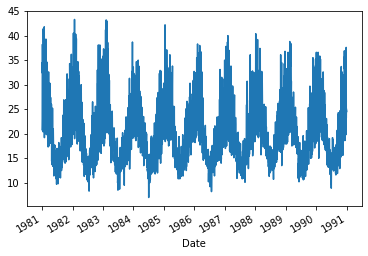

In [84]:
series.plot()
plt.show()

- Pareciera existir un patrón de temporalidad (seasonality), donde las mayores temperaturas se dan a principio de año y de ahí comienzan a bajar hasta llegar a las más bajas a mediados de año. Pasado medio año, las temperaturas vuelven a comenzar a elevarse. Este patrón es constante.
- También se puede resaltar que el gráfico es más denso entre los 20 y 30 grados, lo cual indica que la media de temperatura suele encontrarse por ahí.

### 1.7

- Agrupe los datos y muestre un gráfico similar al de la seccion 6.4 de las lecturas (Stacked lines plots).  
- ¿Puede hacer algún comentario del comportamiento anual de los datos?

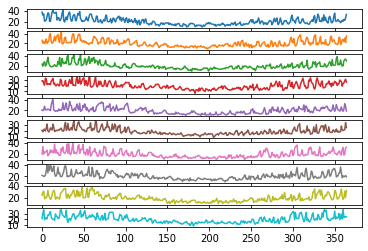

In [96]:
from pandas import Grouper # as TimeGrouper is deprecated

groups = series.groupby(Grouper(freq='A')) # groups data by year
years = DataFrame() # data frame for divided data

# values are placed in the dataframe, divided by year
for name, group in groups:
    years[name.year] = group.values
    
years.plot(subplots=True, legend=False)
plt.show()

- Cada año, las temperaturas son más bajas y constantes a mediados de año, entre los días 100-250 aproximadamente. 
- Las temperaturas más altas se dan en los primeros 100 días y los últimos 65 días (300-365). 
    - En estos rangos de principio y fin de año, las temperaturas también fluctúan más.

### 1.8
- Muestre el histograma de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


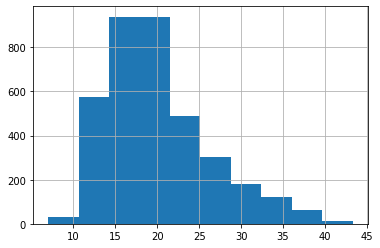

In [97]:
series.hist()
plt.show()

- La temperatura no parece seguir una distribución gaussiana, pues no es uniforme y tiene muchos más valores a la derecha de la media. 
    - La distribución parece ser asimétrica
- Podemos ver que la media de la temperatura se encuentra entre 15 y 20 grados

### 1.9
- Muestre el gráfico de densidad de la variable series. 
- ¿Qué conclusiones puede sacar del comportamiento de los datos?


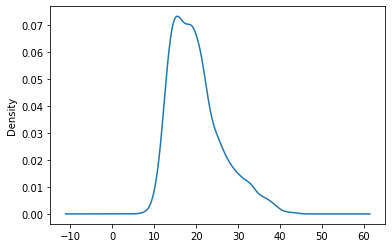

In [100]:
series.plot(kind = 'kde')
plt.show()

- Los valores no parecen seguir una distribución gaussiana, pues se ve muy pu

### 1.10
- Agrupe los datos de la variable serie de manera Anual, y muestre los Boxplot de cada año. 
1. ¿Cómo se interpreta un gráfico Boxplot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?

### 1.11
- Agrupe los datos de la variable serie de manera Anual, y muestre el Heat Map por año. 
1. ¿Cómo se interpreta un gráfico Heat Map?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.12
- Muestre el Lag Scatter plot de la variable series. 
1. ¿Cómo se interpreta un Lag Scatter plot?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


### 1.13
- Muestre el gráfico Autocorrelación de la variable series. 
1. ¿Cómo se interpreta este tipo de gráficos?
1. ¿Qué conclusiones puede sacar del comportamiento de los datos?


# Parte 2.  Diferenciación  (20 puntos)

1. Se adjunta un archivo en formato PDF titulado: Lectura_Caps_1-6_15. Estudie el capítulo 15. Se adjutan los archivos .csv requeridos para probar el código.
1. Luego, utilizando el archivo 'yearly-water-usage.csv' realice la presente sección.
1. Complete en celdas de código y/o texto según convenga. 
1. Documente bien su código.

### 2.1
- Cargue el archivo proporcionado y muestre los 4 primeros registros.

### 2.2

- Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

### 2.3

- Aplique la "Diferenciación" a la serie, y al resultado vuelva a aplicarle el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05)

### 2.4

- En un mismo gráfico de líneas, presente la serie original (en azul) y la serie diferenciada (en rojo).

### 2.5

- ¿Qué cambio nota de la serie antes de diferenciar a la serie diferenciada?


# Parte 3.  Regresión lineal y breve diseño experimental  (28 puntos)

Se le suministra un archivo llamado datos_practica2.csv.  

### 3.1
- Cargue el archivo.
- Muestre cuántas filas tiene el conjunto de datos.
- Revise si la serie es o no estacionaria. Aplique el Augmented Dickey-Fuller test, con una confianza estadística del 95% (por lo tanto un threshold del 0.05). Y haga la diferenciación en caso de ser no estacionaria.


### 3.2
- Utilizando la técnica de Lag Features, cree un DataFrame con los valores y un Lag=30
- Utilice dropna() para borrar cualquier fila con NA
- Muestre la primera fila.

Se podrá ver algo así:

    t-29  t-28  t-27  t-26  t-25  t-24  t-23  t-22  t-21  t-20  ...   t-8  \
30  38.1  32.4  34.5  20.7  21.5  23.1  29.7  36.6  36.1  20.6  ...  21.7   

     t-7   t-6   t-5   t-4   t-3   t-2   t-1     t   t+1  
30  22.9  26.2  36.5  41.8  21.5  19.2  25.0  28.9  23.2  

[1 rows x 31 columns]

### 3.3
- Divida entre X e y.
- Escale X utilizando MinMaxScaler. 
- Agregue como primer columna el bias (llena de 1's).
- Muestre los tres primeros registros.

### 3.4
- Divida entre train y test (tanto X como y).
- Utilice 70% train y 30% test, modo aleatorio.


### 3.5

- Vamos ahora a utilizar sklearn para calcular los pesos.
- Utilizando from sklearn.linear_model import LinearRegression, y la división anterior en train y test. Ajuste el modelo y calcule $y_{pred}$, calcule las métricas $R2$ y $MSE$ entre el $y_{pred}$ y el $y_{test}$. 


### 3.6

- En esta parte vamos a probar los conceptos de  tran/validation/test y cross-validation.
- Usando KFold y regresión Ridge, prepare un diseño experimental con 80% para el cross-validation y 20% para el test (distribución de manera aleatoria), con 5 folds. 
- La idea es encontrar el mejor valor para el hiperparámetro alfa en el modelo (factor de regularización). 
- Muestre los resultados obtenidos y coméntelos (mismas métricas $R2$ y $MSE$ ).


### 3.7

- Analice cómo se comporta no solo el promedio, sino la desviación estándar.